In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

In [2]:
import constants, master

In [3]:
# DATA SOURCES
global_deaths_url = constants.GLOBAL['global_deaths_url']
global_confirmed_url = constants.GLOBAL['global_confirmed_url']
global_recovered_url = constants.GLOBAL['global_recovered_url']

In [4]:
# CREATING TRANSFORMER INSTANCE
transformer = master.DataTransformer()

In [5]:
# LOADING DATA
dfd = transformer.load_data(global_deaths_url)
dfc = transformer.load_data(global_confirmed_url)
dfr = transformer.load_data(global_recovered_url)

In [6]:
dfd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,205,216,218,219,220,227,235,246,249,257
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,32,32,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,582,592,600,609,617,623,630,638,646,653
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,4,4,4,4,4,4,4


In [7]:
# LAT / LONG DATA
lat_long_df = transformer.prepare_latlong_data(dfd)

In [8]:
# COLUMNS TO SELECT
cols = [col for col in dfd.columns if col not in ["Lat","Long","Province/State"]]
date_cols = [col for col in dfd.columns if col not in ["Lat","Long","Province/State", "Country/Region"]]

In [25]:
master_data = transformer.prepare_master_data([dfd, dfc, dfr], cols, date_cols, region_col = "Country/Region", for_world = True, for_model = False, is_sir_model = False)   # contains time series data for all the countries
master_data_var = transformer.prepare_master_data([dfd, dfc, dfr], cols, date_cols, region_col = "Country/Region", for_world = True, for_model = True, is_sir_model = False)   # contains time series data for all the countries
# master_data_sir = transformer.prepare_master_data([dfd, dfc, dfr], cols, date_cols, region_col = "Country/Region", for_world = True, for_model = True, is_sir_model = True)   # contains time series data for all the countries

for_model :False
for_model :True


In [10]:
master_data.head()

,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,active_incr_rate,deaths_incr_rate,confirmed_incr_rate,recovered_incr_rate,active_frac,deaths_frac,recovery_frac,reproduction_number,region
Date,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,Afghanistan
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,Afghanistan
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,Afghanistan
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,Afghanistan
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,Afghanistan


In [11]:
india_df = master_data[master_data.region.str.lower() == 'india']

In [12]:
india_df.head()

,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,active_incr_rate,deaths_incr_rate,confirmed_incr_rate,recovered_incr_rate,active_frac,deaths_frac,recovery_frac,reproduction_number,region
Date,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,India
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,India
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,India
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,India
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0,India


In [23]:
def get_single_country_forecast_data(country_name, num_days):
    # if not request.json:
    #     abort(400)
    # req = request.json
    
    # EXTRACTING REQUEST JSON DATA
    # country_name = req["country_name"].lower()      
    # num_days = req["num_days"]   
#     country_name = request.args.get('country','')
#     num_days = request.args.get('days','')
    # print(num_days)
    
    # DEFAULT ALL DATA BEING TAKEN
    country_name = "world" if country_name == "" else country_name # By Default taking World Data
    num_days = 10 if num_days == "" else int(num_days)             # By Default taking 10 days
        
    # FILTERING FOR THE GIVEN COUNTRY
    master_data_filt = master_data_var[master_data_var.region.str.lower() == country_name]
        
    # TRAIN TEST SPLIT
    train = master_data_filt.iloc[:,:3]
    # test = master_data_filt.iloc[-test_days:,:3] # Taking last 10 days as testing data
    
    # FITTING VAR MODEL
    model = master.VectorAutoRegression(train, num_days)
    res = model.fit()
    
    # DW TEST FOR SERIAL CORRELATION
    # durbin_watson(res.resid)                         # should be around 2 for zero correlation
    
    # PREDICTING
    final_forecast = model.predict(res).reset_index()
    
    return final_forecast

In [32]:
india_df_fc = get_single_country_forecast_data("india", 15).set_index('Date')

C:\Users\gdanish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [33]:
india_df_fc.tail()

,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,active_incr_rate,deaths_incr_rate,confirmed_incr_rate,recovered_incr_rate,active_frac,deaths_frac,recovery_frac,reproduction_number
Date,,,,,,,,,,,,,,,,
2020-06-11,8810.0,454775.0,161921.0,284044.0,390.0,45773.0,7284.0,38099.0,15.49%,4.63%,11.19%,4.71%,62.46%,1.94%,35.6%,6.23
2020-06-12,9221.0,506496.0,170203.0,327072.0,411.0,51721.0,8282.0,43028.0,15.15%,4.67%,11.37%,5.11%,64.58%,1.82%,33.6%,6.20
2020-06-13,9641.0,564977.0,177669.0,377667.0,420.0,58481.0,7466.0,50595.0,15.47%,4.55%,11.55%,4.39%,66.85%,1.71%,31.45%,7.78
2020-06-14,10101.0,635252.0,186193.0,438958.0,460.0,70275.0,8524.0,61291.0,16.23%,4.77%,12.44%,4.8%,69.1%,1.59%,29.31%,8.19
2020-06-15,10564.0,717147.0,194194.0,512389.0,463.0,81895.0,8001.0,73431.0,16.73%,4.58%,12.89%,4.3%,71.45%,1.47%,27.08%,10.18


In [37]:
import matplotlib.pyplot as plt

In [55]:
india_df_fc['reproduction_number'][-15:-5]

Date
2020-06-01    2.01
2020-06-02    2.60
2020-06-03    2.05
2020-06-04    2.70
2020-06-05    2.72
2020-06-06    4.13
2020-06-07    3.45
2020-06-08    4.10
2020-06-09    4.47
2020-06-10    5.54
Name: reproduction_number, dtype: float64

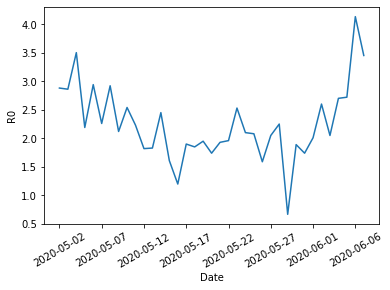

In [67]:
india_df_fc['reproduction_number'][-45:-8].plot()
# plt.axvline("2020-05-31", color = 'red')
plt.xticks(rotation = 30)
# plt.plot_date(x = '2020-05-31')
plt.ylabel('R0')
plt.show()

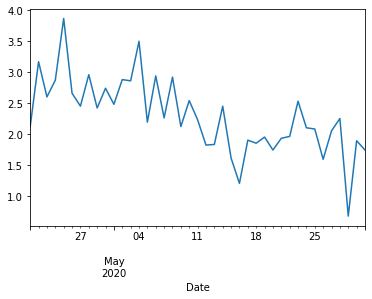

In [66]:
india_df['reproduction_number'].iloc[90:].plot()

In [17]:
master_data_sir.values[0].tolist()

[0, 1, 0, 1, 'Afghanistan']

# VAR Model

In [3]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# SIR Model

# INDIA Data

In [17]:
# INDIA DATA
india_district_url = constants.INDIA['india_district_url']
india_states_daily_url = constants.INDIA['india_states_daily_url']

In [18]:
# CREATING INSTANCE
statesman = master.DataTransformerIndia(india_district_url, india_states_daily_url)

In [19]:
# DISTRICTS AND STATES DATA
df_dist = statesman.load_district_data()
df_states = statesman.load_states_data()
dfsd, dfsc, dfsr = [statesman.load_data(df_states, status) for status in ['Deceased', 'Confirmed', 'Recovered']]

In [20]:
# STATES COORDS DATA
state_code_df = statesman.load_state_coord_data()

In [21]:
# REQUIRED COLUMN NAMES
cols_state = dfsd.columns.tolist()
date_cols_state = [col for col in dfsd.columns if col not in ["state_code"]]

In [23]:
# FINDING STATES MASTER DATA
state_master_data = statesman.prepare_master_data([dfsd, dfsc, dfsr], cols_state, date_cols_state, region_col = "state_code", for_world = False, for_model = False, is_sir_model = False)   # contains time series data for all the countries
# state_master_data_var = statesman.prepare_master_data([dfsd, dfsc, dfsr], cols_state, date_cols_state, region_col = "state_code", for_world = False, for_model = True, is_sir_model = False)   # contains time series data for all the countries
# state_master_data_sir = statesman.prepare_master_data([dfsd, dfsc, dfsr], cols_state, date_cols_state, region_col = "state_code", for_world = False, for_model = True, is_sir_model = True)   # contains time series data for all the countries

for_model :False


In [24]:
state_master_data

,Date,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,deaths_incr_rate,confirmed_incr_rate,recovered_incr_rate,transmission_rate_daily,case_fatality_rate_daily,recovery_rate_daily,reproduction_number,case_fatality_rate_cum,recovery_rate_cum,region
0,2020-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,0.0%,an
1,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,0.0%,an
2,2020-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,0.0%,an
3,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,0.0%,an
4,2020-03-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,0.0%,an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-05-17,238.0,2677.0,959.0,1480.0,6.0,101.0,67.0,28.0,2.59%,3.92%,7.51%,1.93%,5.94%,66.34%,1.42,8.89%,35.82%,wb
65,2020-05-18,244.0,2824.0,1006.0,1574.0,6.0,147.0,47.0,94.0,2.52%,5.49%,4.9%,6.35%,4.08%,31.97%,3.00,8.64%,35.62%,wb
66,2020-05-19,250.0,2961.0,1074.0,1637.0,6.0,137.0,68.0,63.0,2.46%,4.85%,6.76%,4.0%,4.38%,49.64%,1.93,8.44%,36.27%,wb
67,2020-05-20,253.0,3103.0,1136.0,1714.0,3.0,142.0,62.0,77.0,1.2%,4.8%,5.77%,4.7%,2.11%,43.66%,2.24,8.15%,36.61%,wb


In [35]:
df_states_overall = state_master_data.groupby('region').agg('last')

In [37]:
df_states_overall.head()

,Date,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,deaths_incr_rate,confirmed_incr_rate,recovered_incr_rate,transmission_rate_daily,case_fatality_rate_daily,recovery_rate_daily,reproduction_number,case_fatality_rate_cum,recovery_rate_cum
region,,,,,,,,,,,,,,,,,,
an,2020-05-21,0.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,100.0%
ap,2020-05-21,54.0,2605.0,1705.0,846.0,1.0,45.0,41.0,3.0,1.89%,1.76%,2.46%,0.36%,2.22%,91.11%,1.07,2.07%,65.45%
ar,2020-05-21,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,100.0%
as,2020-05-21,3.0,211.0,55.0,153.0,0.0,22.0,6.0,16.0,0.0%,11.64%,12.24%,11.68%,0.0%,27.27%,3.67,1.42%,26.07%
br,2020-05-21,9.0,1987.0,571.0,1407.0,0.0,211.0,0.0,211.0,0.0%,11.88%,0.0%,17.64%,0.0%,0.0%,1.00,0.45%,28.74%


In [38]:
df_states_overall = df_states_overall.join(state_code_df).reset_index()

In [40]:
df_states_overall.head()

,region,Date,deaths,confirmed,recovered,active,deaths_incr,confirmed_incr,recovered_incr,active_incr,...,recovered_incr_rate,transmission_rate_daily,case_fatality_rate_daily,recovery_rate_daily,reproduction_number,case_fatality_rate_cum,recovery_rate_cum,state,latitude,longitude
0,an,2020-05-21,0.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,...,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,100.0%,Andaman and Nicobar Islands,11.740087,92.658640
1,ap,2020-05-21,54.0,2605.0,1705.0,846.0,1.0,45.0,41.0,3.0,...,2.46%,0.36%,2.22%,91.11%,1.07,2.07%,65.45%,Andhra Pradesh,15.912900,79.740000
2,ar,2020-05-21,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0%,0.0%,0.0%,0.0%,0.00,0.0%,100.0%,Arunachal Pradesh,28.210000,94.720000
3,as,2020-05-21,3.0,211.0,55.0,153.0,0.0,22.0,6.0,16.0,...,12.24%,11.68%,0.0%,27.27%,3.67,1.42%,26.07%,Assam,26.244156,92.537842
4,br,2020-05-21,9.0,1987.0,571.0,1407.0,0.0,211.0,0.0,211.0,...,0.0%,17.64%,0.0%,0.0%,1.00,0.45%,28.74%,Bihar,25.090000,85.310000


In [43]:
df_states_overall.loc[0,'region'].upper()

'AN'